<a href="https://colab.research.google.com/github/kylepayne0110/heart-disease-prediction-ml/blob/main/Stats_Project2_Logistics_RandomForeste_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Two: Logistic Regression and Random Forests
For Project Two, you have been asked to create different models analyzing a Heart Disease data set. Before beginning work on the project, be sure to read through the Project Two Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project Two Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.

Scenario
You are a data analyst researching risk factors for heart disease at a university hospital. You have access to a large set of historical data that you can use to analyze patterns between different health indicators (e.g. fasting blood sugar, maximum heart rate, etc.) and the presence of heart disease. You have been asked to create different logistic regression models that predict whether or not a person is at risk for heart disease. A model like this could eventually be used to evaluate medical records and look for risks that might not be obvious to human doctors. You have also been asked to create a classification random forest model to predict the risk of heart disease and a regression random forest model to predict the maximum heart rate achieved.

There are several variables in this data set, but you will be working with the following important variables:

Variable - What does it represent?

age - The person's age in years

sex - The person's sex (1 = male, 0 = female)

cp - The type of chest pain experienced (0=no pain, 1=typical angina, 2=atypical angina, 3=non-anginal pain)

trestbps - The person's resting blood pressure

chol - The person's cholesterol measurement in mg/dl

fbs - The person's fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false)

restecg - Resting electrocardiographic measurement (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach - The person's maximum heart rate achieved

exang - Exercise-induced angina (1=yes, 0=no)

oldpeak - ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope - The slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)

ca - The number of major vessels (0-3)

target - Heart disease (0=no, 1=yes)

Install Libraries
In the following code block, you will install appropriate libraries to use in this project.

Click the Run button on the toolbar to run this code.


Note: The code section below will first install three R packages: "ResourceSelection", "pROC" and "rpart.plot". Please do not move to the next step until the packages are fully installed. This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.

In [ ]:
print("This step will first install three R packages. Please wait until the packages are fully installed.")
print("Once the installation is complete, this step will print 'Installation complete!'")

install.packages("ResourceSelection")
install.packages("pROC")
install.packages("rpart.plot")

print("Installation complete!")

[1] "This step will first install three R packages. Please wait until the packages are fully installed."
[1] "Once the installation is complete, this step will print 'Installation complete!'"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Installation complete!"


Prepare Your Data Set
In the following code block, you have been given the R code to prepare your data set.

Click the Run button on the toolbar to run this code.

In [ ]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
2,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
3,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
4,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
5,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
6,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
7,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
8,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
9,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

Model #1 - First Logistic Regression Model
You have been asked to create a logistic regression model for heart disease (target) using the variables age (age), resting blood pressure (trestbps), exercised induced angina (exang) and maximum heart rate achieved (thalach). Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your logistic regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

Model #2 - Second Logistic Regression Model
You have been asked to create a logistic regression model for heart disease (target) using the variables age of the individual (age), resting blood pressure (trestbps), type of chest pain (cp) and maximum heart rate achieved (thalach). You also have to include the quadratic term for age and the interaction term between age and maximum heart rate achieved. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

In [ ]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
2,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
3,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
4,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
5,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
6,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
7,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
8,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
9,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

In [ ]:
#create and fit the logistic regression model
model1 <- glm(target ~ age+trestbps+cp+thalach+age+I(age^2)+age:thalach, data = heart_data, family = "binomial")

#summarize the model
summary(model1)


Call:
glm(formula = target ~ age + trestbps + cp + thalach + age + 
    I(age^2) + age:thalach, family = "binomial", data = heart_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.556e+01  1.054e+01  -1.476  0.13988    
age          1.744e-01  2.669e-01   0.653  0.51357    
trestbps    -1.958e-02  8.978e-03  -2.181  0.02916 *  
cp1          1.913e+00  4.437e-01   4.313 1.61e-05 ***
cp2          2.037e+00  3.473e-01   5.867 4.45e-09 ***
cp3          1.777e+00  5.477e-01   3.245  0.00117 ** 
thalach      1.363e-01  5.119e-02   2.663  0.00775 ** 
I(age^2)     8.424e-04  1.750e-03   0.481  0.63025    
age:thalach -1.867e-03  8.909e-04  -2.095  0.03616 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 293.67  on 294  degrees of freedom
AIC: 311.67

Number of Fisher Scoring iterations: 5


In [ ]:
conf_int <- confint.default(model1, level=0.95)
round(conf_int,4)

,2.5 %,97.5 %
(Intercept),-36.2272,5.0999
age,-0.3488,0.6975
trestbps,-0.0372,-0.0020
cp1,1.0439,2.7830
cp2,1.3566,2.7178
cp3,0.7039,2.8507
thalach,0.0360,0.2367
I(age^2),-0.0026,0.0043
age:thalach,-0.0036,-0.0001


In [ ]:
library(ResourceSelection)

print("Hosmer-Lemeshow Goodness of Fit Test")
h1 = hoslem.test(model1$y, fitted(model1), g=50)
h1

[1] "Hosmer-Lemeshow Goodness of Fit Test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  model1$y, fitted(model1)
X-squared = 52, df = 48, p-value = 0.3209


In [ ]:
#predict heart disease or no heart disease for the data set using the model
depvar_pred_prob = predict(model1, type = "response")

#if the predicted probability of default is >= 0.50 then predict heart disease (heart disease=1) otherwise predict no heart disease
depvar_pred = as.factor(ifelse(depvar_pred_prob >= 0.5, '1', '0'))

#create the confusion matrix
conf.matrix <- table(heart_data$target, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": heart disease=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": heart disease=")

#print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: heart disease=0,Prediction: heart disease=1
Actual: heart disease=0,102,36
Actual: heart disease=1,36,129


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Area Under the Curve (AUC)"


[1] 0.8478

[1] "ROC Curve"


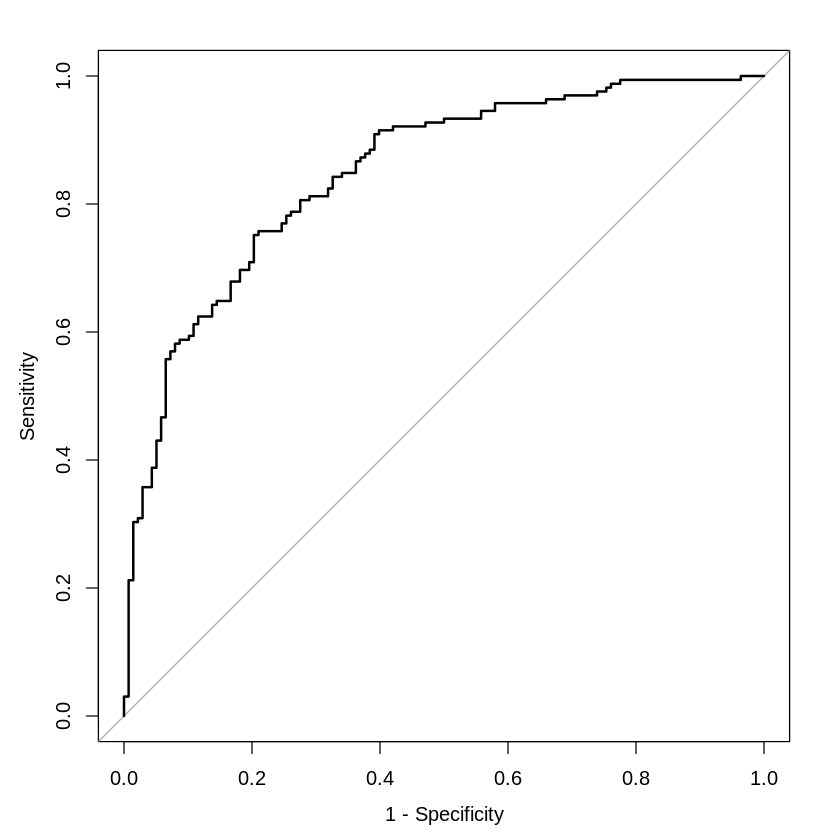

In [ ]:
library(pROC)

labels <- heart_data$target
predictions <- depvar_pred_prob

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")

plot(roc, legacy.axes = TRUE)

In [ ]:
print("Prediction: age is 50, resting blood pressure is 115, no cest pain, thalach is 133")
pred_data_1 <- data.frame(age=50, trestbps=115, cp="0", thalach=133)
pred1 <- predict(model1, pred_data_1, type='response')
round(pred1,4)

[1] "Prediction: age is 50, resting blood pressure is 115, no cest pain, thalach is 133"


1 
0.2188

Random Forest Classification Model
You have been asked to create a random forest classification model for the presence of heart disease (target) using the variables age (age), sex (sex), chest pain type (cp), resting blood pressure (trestbps), cholesterol measurement (chol), resting electrocardiographic measurement (restecg), exercise-induced angina (exang), and number of major vessels (ca). Before writing any code, review Section 5 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

In [ ]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
2,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
3,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
4,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
5,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
6,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
7,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
8,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
9,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

In [ ]:
set.seed(6522048)

#partition the data set into training and testing data
samp.size = floor(0.85*nrow(heart_data))

#training set
print("Number of rows for the training set")
train_ind3 = sample(seq_len(nrow(heart_data)), size = samp.size)
train.data3 = heart_data[train_ind3,]
nrow(train.data3)

#testing set
print("Number of rows for the testing set")
test.data3 = heart_data[-train_ind3,]
nrow(test.data3)

[1] "Number of rows for the training set"


[1] 257

[1] "Number of rows for the testing set"


[1] 46

In [ ]:
set.seed(6522048)

install.packages("randomForest")
library(randomForest)

#create randon classification random forest model
model_rf1 <- randomForest(target ~ age+sex+cp+trestbps+chol+restecg+exang+ca, data=train.data3, ntree = 150)

#train
#confusion matrix
print("Confusion Matrix: Training set based on random forest model built using 150 trees")
train.data3.predict <- predict(model_rf1, train.data3, type = "class")

#construct the confusion matrix
conf.matrix <- table(train.data3$target, train.data3.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

#print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


#test
#confusion matrix
print("Confusion Matrix: Testing set based on random forest model built using 150 trees")
test.data3.predict <- predict(model_rf1, test.data3, type = "class")

#construct the confusion matrix
conf.matrix <- table(test.data3$target, test.data3.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

#print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



[1] "Confusion Matrix: Training set based on random forest model built using 150 trees"


,Prediction: 0,Prediction: 1
Actual: 0,118,1
Actual: 1,1,137


[1] "Confusion Matrix: Testing set based on random forest model built using 150 trees"


,Prediction: 0,Prediction: 1
Actual: 0,15,4
Actual: 1,6,21


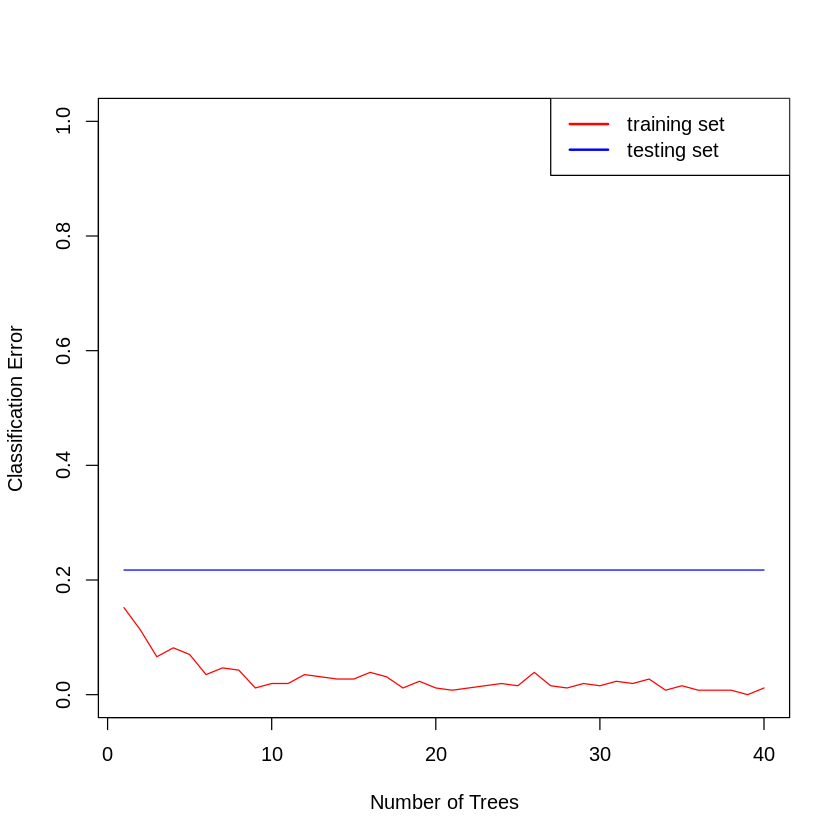

In [ ]:
set.seed(6522048)
library(randomForest)

#checking
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=150, by=1)) {
  #print(i)

  trees <- c(trees, i)

  model_rf1 <- randomForest(target ~ age+sex+cp+trestbps+chol+restecg+exang+ca, data=train.data3, ntree = i)

  train.data3.predict <- predict(model_rf1, train.data3, type = "class")
  conf.matrix1 <- table(train.data3$target, train.data3.predict)
  train_error = 1-(sum(diag(conf.matrix1)))/sum(conf.matrix1)
  train <- c(train, train_error)

  test.data.predict <- predict(model_rf1, test.data3, type = "class")
  conf.matrix2 <- table(test.data3$target, test.data3.predict)
  test_error = 1-(sum(diag(conf.matrix2)))/sum(conf.matrix2)
  test <- c(test, test_error)

}

plot(trees, train,type = "l",ylim=c(0,1.0),col = "red", xlab = "Number of Trees", ylab = "Classification Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2)

In [ ]:
#create new model with only 10 trees
model_rf1 <- randomForest(target ~ age+sex+cp+trestbps+chol+restecg+exang+ca, data=train.data3, ntree = 10)

#train
#confusion matrix
print("Confusion Matrix: Training set based on random forest model built using 10 trees")
train.data3.predict <- predict(model_rf1, train.data3, type = "class")

#construct the confusion matrix
conf.matrix <- table(train.data3$target, train.data3.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

#print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


#test
#confusion matrix
print("Confusion Matrix: Testing set based on random forest model built using 10 trees")
test.data3.predict <- predict(model_rf1, test.data3, type = "class")

#construct the confusion matrix
conf.matrix <- table(test.data3$target, test.data3.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

#print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix: Training set based on random forest model built using 10 trees"


,Prediction: 0,Prediction: 1
Actual: 0,115,4
Actual: 1,1,137


[1] "Confusion Matrix: Testing set based on random forest model built using 10 trees"


,Prediction: 0,Prediction: 1
Actual: 0,14,5
Actual: 1,6,21


In [ ]:
#calculate metrics
true_positives <- conf.matrix["Actual: 1", "Prediction: 1"]
false_positives <- conf.matrix["Actual: 0", "Prediction: 1"]
true_negatives <- conf.matrix["Actual: 0", "Prediction: 0"]
false_negatives <- conf.matrix["Actual: 1", "Prediction: 0"]

print(paste("True Positives:", true_positives))
print(paste("False Positives:", false_positives))
print(paste("True Negatives:", true_negatives))
print(paste("False Negatives:", false_negatives))

classification_accuracy <- (true_positives + true_negatives) / sum(conf.matrix)
classification_error <- (false_positives + false_negatives) / sum(conf.matrix)

print(paste("Classification Accuracy:", classification_accuracy))
print(paste("Classification Error:", classification_error))

[1] "True Positives: 21"
[1] "False Positives: 5"
[1] "True Negatives: 14"
[1] "False Negatives: 6"
[1] "Classification Accuracy: 0.760869565217391"
[1] "Classification Error: 0.239130434782609"
